# Checking my current working directory.

In [1]:
pwd

'/Users/kevinstewart/Desktop'

# Import packages and load the data.

In [2]:
import pandas as pd
#Remove error code for copying dfs
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Import seaborn package for pretty charts
import seaborn as sns
sns.set(style="whitegrid")

#Find my file location 
file_loc = '/Users/kevinstewart/Desktop/house_sales.csv'

#Load file into a data frame
df = pd.read_csv(file_loc)

#Initial Look at the data
df.describe()
df.count()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


id               21613
date             21613
price            21613
bedrooms         20479
bathrooms        20545
sqft_living      20503
sqft_lot         20569
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

The dataset field  all variables are numeric, except views which are binary, zipcode which are a location which can broken into categories, condition of the home which categorical, and latitude and longitude.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

# Identifying the missing values in the data.

In [5]:
#Find the columns that have NA values
#No NAs in the columns of interest for our regression
df.isna().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We chose our model based on the correlations to price. Price is our response variable and we chose three predictors sqft_living, grade, and bathrooms. We had one continuous predictor in sqft_living, and one categorical variable in  number of bathrooms, and one ordinal variable in grade.

In [7]:
df.corr()[["price"]].sort_values("price", ascending = False)

,price
price,1.000000
sqft_living,0.701579
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.526600
view,0.397293
sqft_basement,0.323816
bedrooms,0.310823
lat,0.307003


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 1. Imputation

#### sqft living

In [9]:
df['sqft_living'] = np.where(df['sqft_living'].isnull(), round(df['sqft_living'].mean()), 
                             df['sqft_living'])

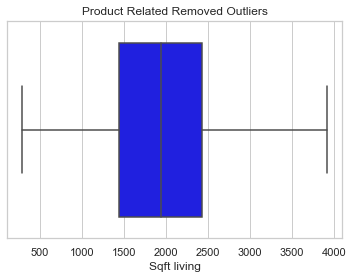

In [10]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1

df_sqft_living  = df[(df['sqft_living'] < Q3 + IQR * 1.5) & (df['sqft_living'] > Q1 - IQR * 1.5)]

boxClean1 = sns.boxplot(x=df_sqft_living.sqft_living, color='blue', showfliers=False)
boxClean1.set(xlabel='Sqft living', title='Product Related Removed Outliers')
plt.show()

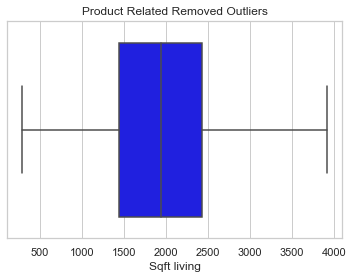

In [11]:
boxClean1 = sns.boxplot(x=df_sqft_living.sqft_living, color='blue', showfliers=False)
boxClean1.set(xlabel='Sqft living', title='Product Related Removed Outliers')
plt.show()

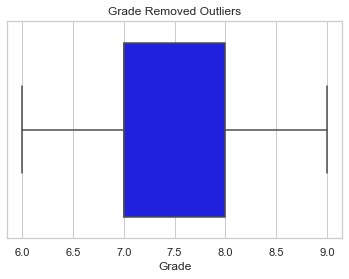

In [44]:
boxClean1 = sns.boxplot(x=df_grade.grade, color='blue', showfliers=False)
boxClean1.set(xlabel='Grade', title='Grade Removed Outliers')
plt.show()

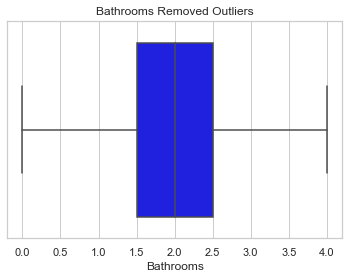

In [45]:
boxClean1 = sns.boxplot(x=df_grade.bathrooms, color='blue', showfliers=False)
boxClean1.set(xlabel='Bathrooms', title='Bathrooms Removed Outliers')
plt.show()

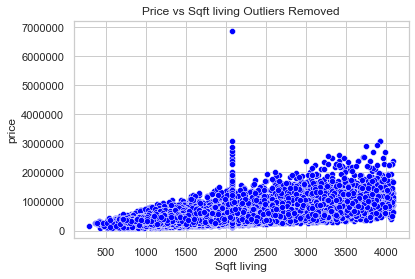

In [46]:
scatter1Clean = sns.scatterplot(x=df_sqft_living["sqft_living"], y=df_sqft_living["price"], color='blue')
scatter1Clean.set(xlabel='Sqft living', ylabel='price', title='Price vs Sqft living Outliers Removed')
plt.show()

### grade

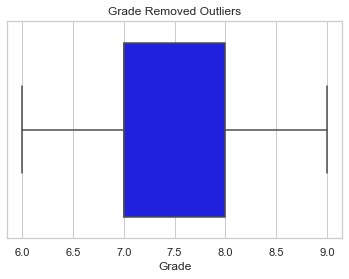

In [14]:
Q1 = df['grade'].quantile(0.25)
Q3 = df['grade'].quantile(0.75)
IQR = Q3 - Q1

df_grade  = df_sqft_living[(df_sqft_living['grade'] < Q3 + IQR * 1.5) & (df_sqft_living['grade'] > Q1 - IQR * 1.5)]

boxClean1 = sns.boxplot(x=df_grade.grade, color='blue', showfliers=False)
boxClean1.set(xlabel='Grade', title='Grade Removed Outliers')
plt.show()

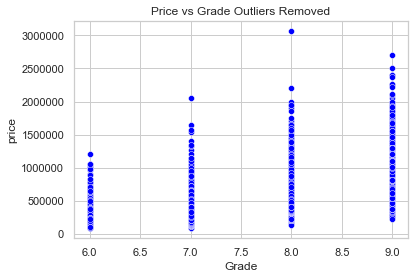

In [15]:
scatter1Clean = sns.scatterplot(x=df_grade["grade"], y=df_grade["price"], color='blue')
scatter1Clean.set(xlabel='Grade', ylabel='price', title='Price vs Grade Outliers Removed')
plt.show()

### bathrooms

In [16]:
df_grade['bathrooms'] = np.where(df_grade['bathrooms'].isnull(), round(df_grade['bathrooms'].mean()), 
                                 df_grade['bathrooms'])

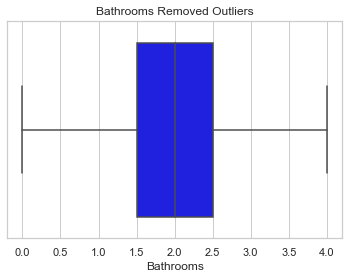

In [17]:
Q1 = df_grade['bathrooms'].quantile(0.25)
Q3 = df_grade['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

df_bathrooms  = df_grade[(df_grade['bathrooms'] < Q3 + IQR * 1.5) & (df_grade['bathrooms'] > Q1 - IQR * 1.5)]

boxClean1 = sns.boxplot(x=df_grade.bathrooms, color='blue', showfliers=False)
boxClean1.set(xlabel='Bathrooms', title='Bathrooms Removed Outliers')
plt.show()

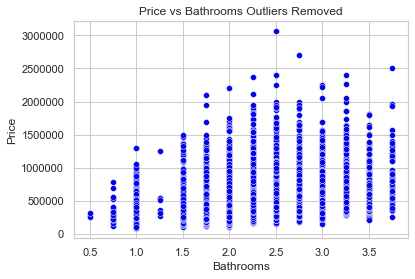

In [18]:
scatter1Clean = sns.scatterplot(x=df_bathrooms["bathrooms"], y=df_bathrooms["price"], color='blue')
scatter1Clean.set(xlabel='Bathrooms', ylabel='Price', title='Price vs Bathrooms Outliers Removed')
plt.show()

# 2. Visuals

In [19]:
df2 = df_bathrooms[['price', 'sqft_living', 'grade', 'bathrooms']]

The heatmap shows a visual interpretation of the the correlations between our predictor variables, and to our response variable. The higest linear correlation among predictor variables is sqft_living and bathrooms at .65, next it would be sqft_living and grade at .63. There is not a very strong correlation between our predictor variables to have concern for multicollinearity. Still in the future this something we would check for using variance inflation factors.

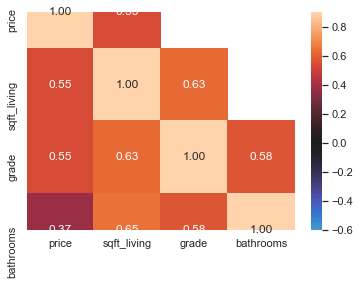

In [20]:
#Heatmap correlation of all used variables.
sns.heatmap(df2.corr(),
            vmin=-0.6,
            vmax=0.9,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(df2.corr().shape[1], k=1, dtype=bool),
            cbar=True)

In [21]:
df2.corr()


,price,sqft_living,grade,bathrooms
price,1.000000,0.546826,0.548251,0.374144
sqft_living,0.546826,1.000000,0.628440,0.648094
grade,0.548251,0.628440,1.000000,0.576349
bathrooms,0.374144,0.648094,0.576349,1.000000


From the histogram of sqft_living, we can infer that it is very close to being normally distributed, there is some positive skewness.

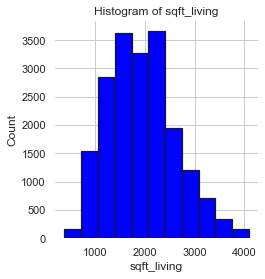

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(df2.sqft_living,
        bins=11,
        edgecolor='k',
        facecolor='blue',
        linewidth=1.2),
plt.title('Histogram of sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Count')
plt.box(False)

From th histogram, we can see that on average the majority of home prices are under  million dollars, and most are approximately around $500,000.

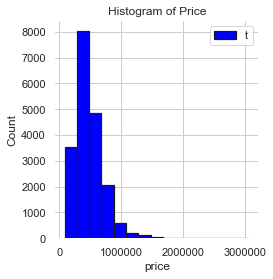

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(df2.price,
        bins=15 ,
        edgecolor='k',
        facecolor='blue',
        linewidth=1.2),
plt.title('Histogram of Price')
plt.xlabel('price')
plt.ylabel('Count')
plt.box(False)
plt.legend('top right')

Viewing the data before building the model. Checking for dispersion and skewness of variables. Price is positively skewed. Sqft_living is positively skewed indicating that the majority of the data is above the mean. the histograms of bathrooms shows that most homes sold in Washington have approximately 2.5 bathrooms.

In [24]:
y = df_bathrooms[['price']]
X = df_bathrooms[['sqft_living', 'grade', 'bathrooms']]

Using a pairplot to visualize the relationship between price, sqqf_living, grade, and bathrooms. There is a positive moderate linear relationship with price sqft_living, grade and bathrooms.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


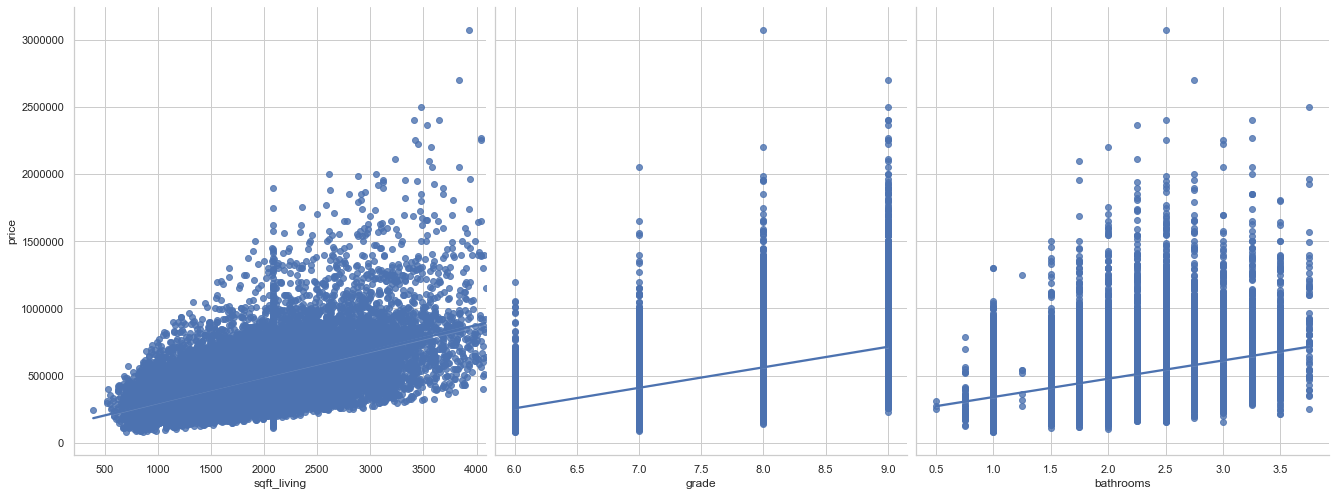

In [25]:
sns.pairplot(df2, x_vars=['sqft_living', 'grade', 'bathrooms'], y_vars='price', size=7, 
             aspect = .9, kind='reg')

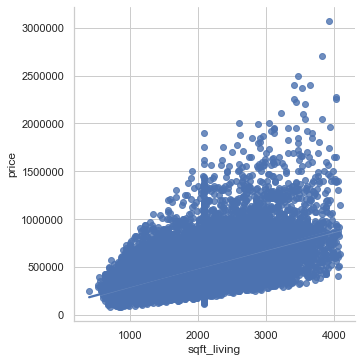

In [26]:
# lm plot
sns.lmplot(x='sqft_living', y='price', data=df2, fit_reg=True)

In [27]:
df2.describe()

,price,sqft_living,grade,bathrooms
count,1.948100e+04,19481.000000,19481.000000,19481.000000
mean,4.797676e+05,1932.415379,7.459679,2.018146
std,2.351986e+05,669.993788,0.844859,0.646383
min,8.200000e+04,390.000000,6.000000,0.500000
25%,3.150000e+05,1420.000000,7.000000,1.500000
50%,4.320000e+05,1890.000000,7.000000,2.000000
75%,5.890000e+05,2340.000000,8.000000,2.500000
max,3.070000e+06,4090.000000,9.000000,3.750000


# 3. Regression

In [28]:
#Import Linear Regression model
from sklearn.linear_model import LinearRegression

In [29]:
#Import a training and testing model
from sklearn.model_selection import train_test_split

In [30]:
# Split the data into 80 percent for training and 20 percent for testing to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [31]:
# Check the shape of the data to verify a 2-D array 
X_train.shape, X_test.shape

((15584, 3), (3897, 3))

In [32]:
# Instantiate the model
Lin_reg = LinearRegression()

In [33]:
#fit the model
Lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = Lin_reg.predict(X_test)

In [35]:
y_pred

array([[419915.82362821],
       [586612.70628469],
       [628525.78953671],
       ...,
       [523929.50463443],
       [282234.66567255],
       [787225.63019431]])

In [36]:
#the intercept for the model
print(Lin_reg.intercept_)

[-466007.98681157]


In [37]:
# The coefficients for the model
print(Lin_reg.coef_)

[[   125.6149676  100120.94982624 -21938.97058719]]


In [38]:
#Viewing the predictor variables outcomes
X_test

,sqft_living,grade,bathrooms
198,1910.0,7,2.50
1690,2440.0,8,2.50
54,2730.0,8,2.25
17175,1880.0,7,1.75
15443,1960.0,7,1.75
...,...,...,...
18223,1190.0,7,1.00
17975,2160.0,7,2.25
17318,1810.0,8,1.75
12499,1480.0,6,1.75


In [39]:
# R-squared value for train set
Lin_reg.score(X_train, y_train)

0.3733386616452166

In [40]:
# R-squared for test set
Lin_reg.score(X_test, y_test)

0.36047447274129807

In [41]:
df3 = sm.OLS(y, X, Lin_reg).fit()

In [42]:
print(df3.params)

sqft_living      157.362561
grade          28342.384122
bathrooms     -15220.537603
dtype: float64


In [43]:
#Performing OLS
print(df3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          4.344e+04
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:35:14   Log-Likelihood:                     -2.6470e+05
No. Observations:               19481   AIC:                                  5.294e+05
Df Residuals:                   19478   BIC:                                  5.294e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------